<h1 align=center> Word Embedding Techniques In Depth </h1>

- It is a technique which converts words into vectors
- Word embeddings are the richer representation of relationship between tokens
- Word embeddings transform the high-dimensional and sparse representations of words (like one-hot encodings) into dense, lower-dimensional vectors that encode meaningful linguistic information

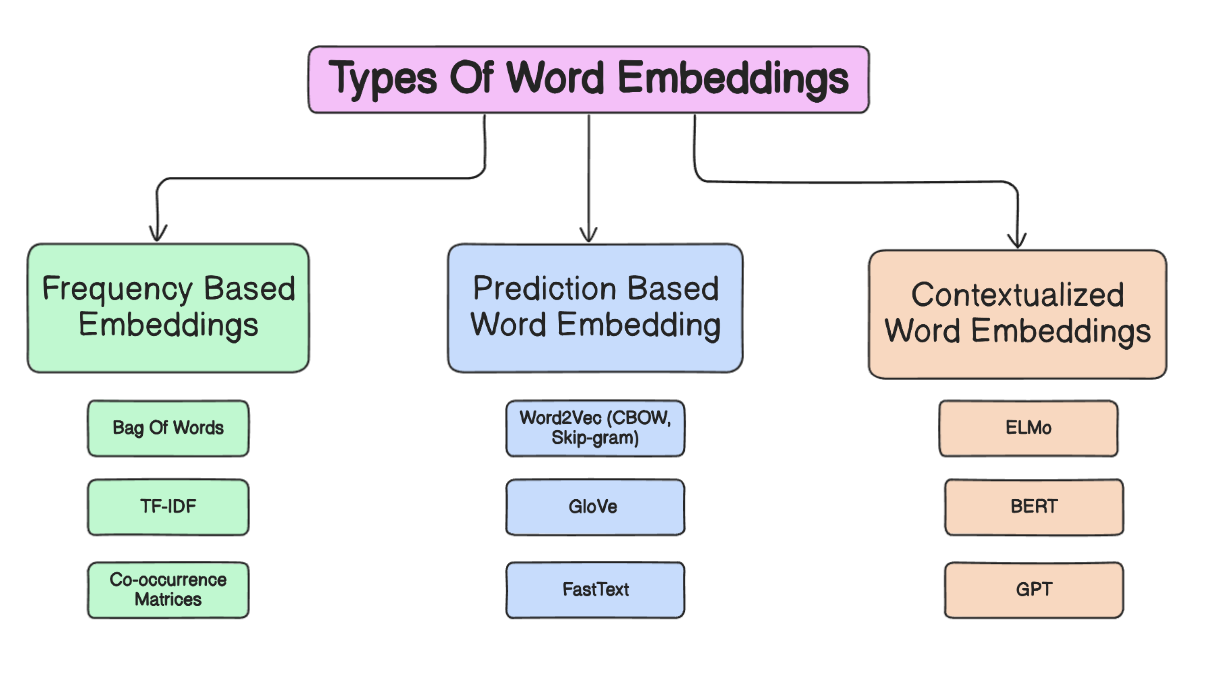

## 1. Frequency-based Embeddings

- Frequency-based word embeddings are a category of techniques that represent words based on their frequency of occurrence and co-occurrence in a given corpus
- Unlike prediction-based methods that learn embeddings through prediction tasks, frequency-based methods derive embeddings from statistical properties of the text

### 1. **Count Vectorization (Bag of Words)**

- **Description**: This method creates a vector for each document by counting the number of times each word appears

**How Bag of Words Works**

1. **Tokenization**: Split the text into individual words or tokens.
2. **Vocabulary Creation**: Create a list of all unique words (vocabulary) from the text corpus.
3. **Vectorization**: Convert each document into a vector of numbers where each number represents the count (or frequency) of a word in the document.

**Practical Example:**

- Below is our text corpus:

| No.  | Sentences |
| --- | --- |
| 1 | "Welcome to UK, UK is a good place.” |
| 2 | "In the UK, Oxford Uni is the best.” |

`Note`: First of all, we must perform text preprocessing, such as converting to lowercase, removing stop words and etc.

- Below is our text corpus after preprocessing:

| No.  | Sentences |
| --- | --- |
| 1 | "welcome uk uk good place” |
| 2 | "uk oxford uni best” |

**Step1: Tokenization**

Split each sentence into words:

- Sentence 1: ["welcome", "uk", "uk", "good", "place"]
- Sentence 2: ["uk", "oxford", "uni", “best"]

**Step2: Vocabulary Creation**

Create a list of unique words from the entire corpus (ignoring case and punctuation):

- Vocabulary: ["welcome", "uk", "good", "place", "oxford", "uni", "best"]

**Step3: Vectorization**

Convert each sentence into a vector based on the word count:

- sentence 1: [1, 2, 1, 1, 0, 0, 0]
- sentence 2: [0, 1, 0, 0, 1, 1, 1]

| sentences | welcome | uk | good | place | oxford | uni | best |
| --- | --- | --- | --- | --- | --- | --- | --- |
| sentence 1 | 1  | 2 | 1 | 1  | 0 | 0 | 0 |
| sentence 2 | 0 | 1 | 0 | 0 | 1 | 1 | 1 |

```python
# python implementatoin
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
    "Welcome to UK, UK is a good place.",
    "In the UK, Oxford Uni is the best."
]

# Create an instance of CountVectorizer
vectorizer = CountVectorizer()

# Fit the model and transform the corpus into BoW vectors
X = vectorizer.fit_transform(corpus)

# Display the vocabulary and vectors
print("Vocabulary:", vectorizer.get_feature_names_out())
print("Vectors:\n", X.toarray())
```

- **Advantages**: Simple and easy to understand
- **Disadvantages**: Results in high-dimensional, sparse vectors that do not capture semantic relationships between words

### 2. **TF-IDF (Term Frequency-Inverse Document Frequency)**

- **Description**: TF-IDF adjusts the raw word count by considering the importance of words in the context of the entire corpus
- **Components**:
    - **Term Frequency (TF)**: Measures how frequently a word appears in a document
    - **Inverse Document Frequency (IDF)**: Measures how important a word is by considering how often it appears across all documents
- **Formula**:
    
    $$
    TF-IDF=TF×IDF\\TF = \frac{\text{No of repetation of words in sentences}}{\text{No of words in sentence}}\\ IDF = log( \frac{\text{No of sentences}}{\text{No of sentences containing the word}})\\
    $$
    

**Practical Example:**

- Below is our text corpus after preprocessing:

| No.  | Sentences |
| --- | --- |
| 1 | "welcome uk uk good place” |
| 2 | "uk oxford uni best” |

**Step1: Compute TF**

- Vocabulary: ["welcome", "uk", "good", "place", "oxford", "uni", "best"]

| Voc | sentence1 | sentence2 |
| --- | --- | --- |
| welcome | 1/5 | 0 |
| uk | 2/5 | 1/4 |
| good | 1/5 | 0 |
| place | 1/5 | 0 |
| oxford | 0 | 1/4 |
| uni | 0 | 1/4 |
| best | 0 | 1/4 |

**Step2: Compute IDF**

| Vocabulary | IDF |
| --- | --- |
| welcome | log(2/1) |
| uk | log(2/3) |
| good | log(2/1) |
| place | log(2/1) |
| oxford | log(2/1) |
| uni | log(2/1) |
| best | log(2/1) |

**Step3: Compute TF x IDF**

| sentences | welcome | uk | good | place | oxford | uni | best |
| --- | --- | --- | --- | --- | --- | --- | --- |
| sentence 1 | 1/5 x log(2/1) | 2/5 x log(2/3) | 1/5 x log(2/1) | 1/5 x log(2/1) | 0 | 0 | 0 |
| sentence 2 | 0 | 1/4 x log(2/3) | 0 | 0 | 1/4 x log(2/1) | 1/4 x log(2/1) | 1/4 x log(2/1) |

```python
# python implementation
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = [
    "Welcome to UK, UK is a good place.",
    "In the UK, Oxford Uni is the best."
]

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)

# Get feature names (vocabulary)
feature_names = vectorizer.get_feature_names_out()

# Convert the TF-IDF matrix to a dense array
tfidf_matrix = X.toarray()

# Display the results
print("Vocabulary:", feature_names)
print("TF-IDF Vectors:\n", tfidf_matrix)
```

- **Advantages**: Reduces the impact of commonly occurring words that are less informative
- **Disadvantages**: Still results in sparse vectors and does not capture word semantics

### 3. **Co-occurrence Matrices**

- **Description**: Represent words by their co-occurrence with other words within a specific context window

**How Co-occurrence Matrices Work**

1. **Define Context Window**: Determine the window size around each word to consider its neighboring words.
2. **Count Co-occurrences**: For each word pair within the context window, count how often they appear together.

**Practical Example:**

- Below is our text corpus after preprocessing:

| No.  | Sentences |
| --- | --- |
| 1 | "welcome uk uk good place” |
| 2 | "uk oxford uni best” |
- Vocabulary: ["welcome", "uk", "good", "place", "oxford", "uni", "best"]

**Step 1: Define Context Window Size**

- A context window size of 1 (considering one word to the left and one word to the right).

**Step 2: Count Co-occurrences**

**1st Iteration:**

- Focus word: welcome
- Window Length = 1
- Context words: uk → after ‘welcome’ and there is no word before

**2nd Iteration:**

- Focus word: uk
- Window Length = 1
- Context words: uk → after ‘uk’ and welcome word before ‘uk’

And it continues …

| _ | welcome | uk | good | place | oxford | uni | best |
| --- | --- | --- | --- | --- | --- | --- | --- |
| welcome | 0 | 1  | 0 | 0 | 0 | 0 | 0 |
| uk | 1 | 2 | 1 | 0 | 1 | 0 | 0 |
| good | 0 | 1 | 0 | 1 | 0 | 0 | 0 |
| place | 0 | 0 | 1 | 0 | 0 | 0 | 0 |
| oxford | 0 | 1 | 0 | 0 | 0 | 1 | 0 |
| uni | 0 | 0 | 0 | 0 | 1 | 0 | 1 |
| best | 0 | 0 | 0 | 0 | 0 | 1 | 0 |

- **Advantages**: Captures some semantic relationships by considering word co-occurrences
- **Disadvantages**: High-dimensional and sparse; can be computationally expensive to compute for large corpora

## 2. Prediction-based Embeddings

- Prediction-based word embeddings are techniques that create word representations by predicting the context in which words appear
- These methods use neural network models to learn word vectors that capture semantic relationships between words based on their usage patterns in large text corpora

### 1. **Word2Vec**

Word2Vec is one of the most well-known prediction-based embedding techniques, developed at Google.

- **Models**:
    - **Continuous Bag of Words (CBOW)**: Predicts the target word based on its surrounding context words. For example, given the context words "the quick brown", it predicts the target word "fox"
    - **Skip-gram**: Predicts the surrounding context words given the target word. For example, given the target word "fox", it predicts context words like "the", "quick", "brown"
- **Training**: Both models use a neural network with a single hidden layer to learn embeddings. The hidden layer weights become the word vectors.
- **Advantages**: Efficient to train on large corpora, captures semantic relationships well.

### 2. **GloVe (Global Vectors for Word Representation)**

GloVe, developed by researchers at Stanford, combines the benefits of both global matrix factorization (like LSA) and local context window methods (like Word2Vec).

- **Method**: Constructs a word co-occurrence matrix from the corpus and then uses matrix factorization to learn word vectors. It captures the global statistical information of the corpus.
- **Training**: Minimizes a weighted least squares objective that models the logarithm of the probability of word co-occurrences.
- **Advantages**: Combines the strengths of word co-occurrence statistics and prediction-based learning.

### 3. **FastText**

Developed by Facebook's AI Research (FAIR) lab, FastText extends Word2Vec by taking sub word information into account.

- **Method**: Represents words as bags of character n-grams. For example, the word "where" could be represented by character trigrams like "whe", "her", "ere".
- **Training**: Similar to Word2Vec, but the model predicts the target word using the sum of its subword n-gram vectors.
- **Advantages**: Handles out-of-vocabulary words better, captures morphological information.

## 3. Contextualized word embeddings

- Contextualized word embeddings represent a significant advancement in NLP, enabling models to understand and generate language with greater nuance and accuracy
- By taking context into account, these embeddings provide more meaningful word representations, leading to superior performance across a wide range of NLP tasks

### 1. **ELMo (Embeddings from Language Models)**

**Developed by**: Allen Institute for AI

**Architecture**: Deep bidirectional LSTM network

**Training Objective**: Language modeling, predicting the next word in a sequence

**Pros**:

- **Context-Sensitive**: Generates different embeddings for the same word based on its context.
- **Pre-trained on Large Corpus**: Can be fine-tuned for various NLP tasks, improving performance.

**Cons**:

- **Computationally Intensive**: Requires significant computational resources for training and inference.
- **Complexity**: More complex to implement and fine-tune compared to static embeddings.

### 2. **BERT (Bidirectional Encoder Representations from Transformers)**

**Developed by**: Google AI

**Architecture**: Transformer-based model

**Training Objective**: Masked Language Modeling (MLM) and Next Sentence Prediction (NSP)

**Pros**:

- **Bidirectional Context**: Considers both left and right context, providing rich embeddings.
- **State-of-the-Art Performance**: Excels in various NLP benchmarks and tasks.

**Cons**:

- **Resource-Intensive**: Requires substantial memory and processing power.
- **Training Time**: Long training times due to the complexity of the model and the amount of data required.

### 3. **GPT (Generative Pretrained Transformer)**

**Developed by**: OpenAI

**Architecture**: Transformer decoder

**Training Objective**: Language modeling, predicting the next word in a sequence

**Pros**:

- **Strong Performance in Text Generation**: Excels at generating coherent and contextually appropriate text.
- **Unidirectional Context**: Effective for tasks where left-to-right context is crucial.

**Cons**:

- **Unidirectional Limitation**: Does not consider right-to-left context, which can be a limitation for some tasks.
- **High Computational Demand**: Similar to BERT, requires significant computational resources.

### 4. **T5 (Text-To-Text Transfer Transformer)**

**Developed by**: Google Research

**Architecture**: Transformer architecture

**Training Objective**: Converts all NLP tasks into a text-to-text format

**Pros**:

- **Versatility**: Can handle a wide range of NLP tasks with a unified approach.
- **Strong Performance**: Achieves excellent results across multiple benchmarks.

**Cons**:

- **Resource-Intensive**: High computational requirements for training and inference.
- **Complexity**: Implementing and fine-tuning can be challenging due to the model's flexibility and size.